# Lab 1: dealing with data in static plots

In this lab we will work with three different datasets:
- World temperature Dataset (https://data.world/data-society/global-climate-change-data/)
- Airbnb in Amsterdam (http://insideairbnb.com/amsterdam/)
- Students mobility (https://stats.oecd.org/Index.aspx?DataSetCode=EAG_ENRL_MOBILES_ORIGIN)

### Todays Lab:
- Creating simple plots from scratch
- Importing datasets: take care with the structure!
- Datatypes, specially datetime
- Line plots, area plots, bar plots and Heatmaps

In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Basic Plots in Matplotlib


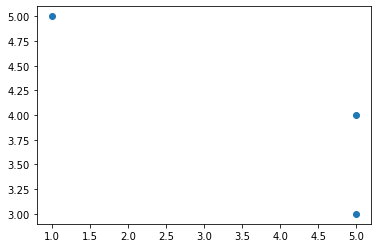

In [2]:
plt.figure()
plt.plot([5,5,1], [3,4,5], 'o') # (x, y, **kwargs)


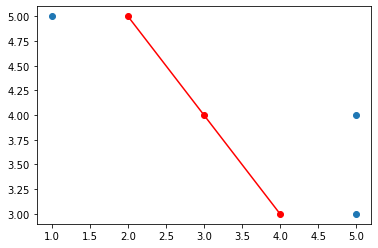

In [3]:
plt.figure()
plt.plot([5,5,1], [3,4,5], 'o')

plt.plot([4,3,2], [3,4,5], '-o', c = 'red')


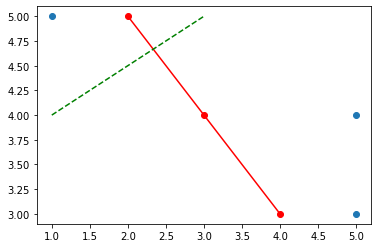

In [4]:
plt.figure()
plt.plot([5,5,1], [3,4,5], 'o')
plt.plot([4,3,2], [3,4,5], '-o', c = 'red')

plt.plot([1,3], [4,5], '--g') # the g refers to green


## Add elements to the plot

(0.0, 6.0, 0.0, 10.0)

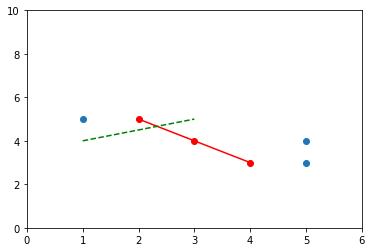

In [5]:
plt.figure()
plt.plot([5,5,1], [3,4,5], 'o')
plt.plot([4,3,2], [3,4,5], '-o', c = 'red')
plt.plot([1,3], [4,5], '--r', c = 'green')

ax = plt.gca() # retrieves the current Axis
ax.axis([0,6,0,10]) # sets the axis limits [x, x, y, y]

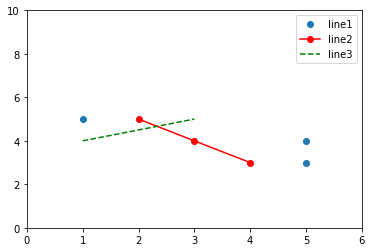

In [6]:
plt.figure()
plt.plot([5,5,1], [3,4,5], 'o')
plt.plot([4,3,2], [3,4,5], '-o', c = 'red')
plt.plot([1,3], [4,5], '--r', c = 'green')
ax = plt.gca()
ax.axis([0,6,0,10])

plt.legend(['line1', 'line2', 'line3']) # adds a legend with variable labels

Text(0.5, 1.0, 'Our trial plot')

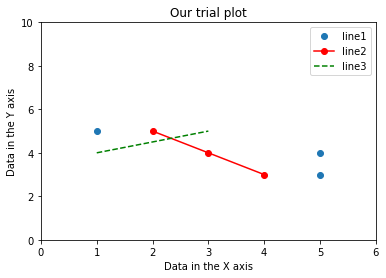

In [7]:
plt.figure()
plt.plot([5,5,1], [3,4,5], 'o')
plt.plot([4,3,2], [3,4,5], '-o', c = 'red')
plt.plot([1,3], [4,5], '--r', c = 'green')
ax = plt.gca()
ax.axis([0,6,0,10])
plt.legend(['line1', 'line2', 'line3'])

plt.xlabel('Data in the X axis')
plt.ylabel('Data in the Y axis')
plt.title('Our trial plot')

([<matplotlib.axis.XTick at 0x11e81edf0>,
 [Text(0, 0, 'Day 1'),
  Text(0, 0, 'Day 2'),
  Text(0, 0, 'Day 3'),
  Text(0, 0, 'Important \n Day!'),
  Text(0, 0, 'Day 5'),
  Text(0, 0, 'Day 6')])

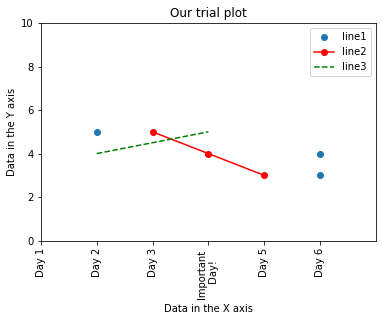

In [8]:
plt.figure()
plt.plot([5,5,1], [3,4,5], 'o')
plt.plot([4,3,2], [3,4,5], '-o', c = 'red')
plt.plot([1,3], [4,5], '--r', c = 'green')
ax = plt.gca()
ax.axis([0,6,0,10])
plt.legend(['line1', 'line2', 'line3'])
plt.xlabel('Data in the X axis')
plt.ylabel('Data in the Y axis')
plt.title('Our trial plot')

plt.xticks(np.arange(6, step=1), ('Day 1','Day 2','Day 3',"Important \n Day!", "Day 5", "Day 6"), rotation=90)

# Structures of datasets

- Grouped Data (e.g. number of international students in the Netherlands)
- One data point per row (e.g. temperature per day)
- Statistical Data 

### Mobility of students
Grouped Data by Country of destination, Country of origin and Year

## How to put data from pandas dataframe into a plot?

### Way 1: extract columns as arrays

In [9]:
mobility_data = pd.read_csv('data/mobility_clean.csv', sep=',', index_col = 0, dtype = {'TIME': 'str'}) # note giving the type string to a year is not a good practice

print(mobility_data.head())

  Orig_Country            Dest_Country LOCATION  TIME Orig_Region  Value  \
0    not found  British Virgin Islands      VGB  2016      Africa    NaN   
1        Libya                 Romania      ROU  2013      Africa   11.0   
2        Libya                 Romania      ROU  2014      Africa   12.0   
3        Libya                 Romania      ROU  2015      Africa   20.0   
4        Libya                 Romania      ROU  2016      Africa   22.0   

                                          Other_info  
0   Students from the Central African Republic, b...  
1           Students from Libya, both sexes (number)  
2           Students from Libya, both sexes (number)  
3           Students from Libya, both sexes (number)  
4           Students from Libya, both sexes (number)  


In [10]:
mobility_data = mobility_data.dropna() # note deleting NA is important here
mobility_data.Value = mobility_data.Value.astype('int64') # note giving integer type is important

print(mobility_data.head())

   Orig_Country Dest_Country LOCATION  TIME Orig_Region  Value  \
1         Libya      Romania      ROU  2013      Africa     11   
2         Libya      Romania      ROU  2014      Africa     12   
3         Libya      Romania      ROU  2015      Africa     20   
4         Libya      Romania      ROU  2016      Africa     22   
13       Angola      Lesotho      LSO  2015      Africa      1   

                                    Other_info  
1     Students from Libya, both sexes (number)  
2     Students from Libya, both sexes (number)  
3     Students from Libya, both sexes (number)  
4     Students from Libya, both sexes (number)  
13   Students from Angola, both sexes (number)  


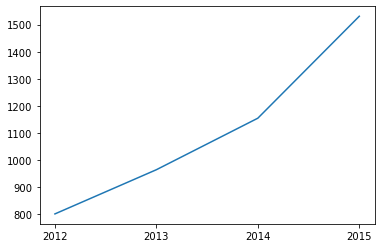

In [11]:
# question: How many Spanish students went to the Netherlands in the last years?
spain_netherlands = mobility_data[(mobility_data.Orig_Country == 'Spain') & (mobility_data.Dest_Country == 'Netherlands')]
# extract the columns as arrays!
years = spain_netherlands.TIME
values = spain_netherlands.Value

plt.figure()
plt.plot(years, values)

### Way 2: transform the data into a matrix

In [12]:
# question: How has the mobility of EU students to the Netherlands evolved?
eu_netherlands_mobility = mobility_data[(mobility_data['Dest_Country']=='Netherlands') & (mobility_data['Orig_Region']=='Europe')]
# for clarity purposes we take the top 7 countries (excluding Germany)
top_countries = eu_netherlands_mobility.sort_values(['Value'], ascending = False).Orig_Country.unique()[1:7]
top_nl_mobility = eu_netherlands_mobility[eu_netherlands_mobility.Orig_Country.isin(top_countries)]
top_nl_mobility = top_nl_mobility[['Orig_Country','TIME', 'Value']] # we just keep the colums we will be plotting!

print(top_nl_mobility.head())

      Orig_Country  TIME  Value
47429      Belgium  2012   2288
47430      Belgium  2013   2373
47431      Belgium  2014   2460
47432      Belgium  2015   2677
52065     Bulgaria  2012   1563


In [13]:
# note: this is three dimensional data, we care about year, Dest_Country, Orig_Country
# we can't just create two arrays that are x and y
# we have to create a matrix from the data!!
matrix_data = top_nl_mobility.pivot(index='TIME', columns='Orig_Country')

print(matrix_data.head())

               Value                                           
Orig_Country Belgium Bulgaria Greece Italy Spain United Kingdom
TIME                                                           
2012            2288     1563   1475  1234   802            888
2013            2373     1614   1959  1487   965           1302
2014            2460     1628   2119  1726  1155           1616
2015            2677     1846   2292  2401  1531           2060


In [14]:
# it is better if we drop the double level in columns (the Value word)
matrix_data.columns = matrix_data.columns.droplevel(0)

print(matrix_data.head())

Orig_Country  Belgium  Bulgaria  Greece  Italy  Spain  United Kingdom
TIME                                                                 
2012             2288      1563    1475   1234    802             888
2013             2373      1614    1959   1487    965            1302
2014             2460      1628    2119   1726   1155            1616
2015             2677      1846    2292   2401   1531            2060


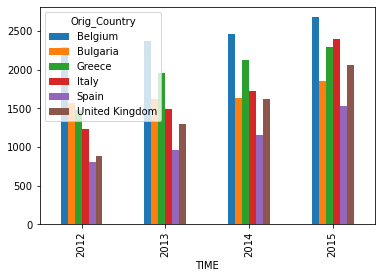

In [15]:
matrix_data.plot(kind = 'bar')

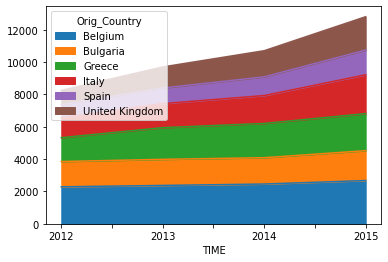

In [16]:
matrix_data.plot(kind = 'area')

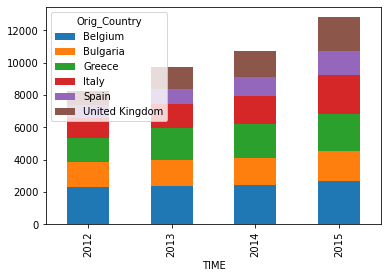

In [17]:
matrix_data.plot(kind="bar", stacked=True)

In [18]:
# if we want to put countries in the x axis and years as variables, we have to transpose the matrix
transposed_matrix = matrix_data.transpose()

print(transposed_matrix.head())

TIME          2012  2013  2014  2015
Orig_Country                        
Belgium       2288  2373  2460  2677
Bulgaria      1563  1614  1628  1846
Greece        1475  1959  2119  2292
Italy         1234  1487  1726  2401
Spain          802   965  1155  1531


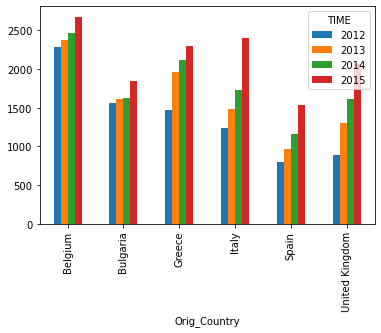

In [19]:
transposed_matrix.plot(kind="bar")

### Amsterdam Airbnb Data
Every row is a data point: the state of a particular apartment in a particular day (price, availability, etc.)

## Giving the right data types is key for a smooth process!!!

In [20]:
airbnb_data = pd.read_csv('data/airbnb_amsterdam/calendar.csv', sep=',', index_col = False, 
                          dtype={'listing_id':'str'}, # and ID is not an integer (it wouldn't make sense to sum it)
                          parse_dates=['date']) # parse dates function will try to make date column into datetime format

print(airbnb_data.head())


  listing_id       date available    price adjusted_price  minimum_nights  \
0       2818 2019-12-08         f   $51.00         $51.00             3.0   
1      58211 2019-12-08         t  $175.00        $175.00             3.0   
2      58211 2019-12-09         t  $175.00        $175.00             3.0   
3      58211 2019-12-10         t  $175.00        $175.00             2.0   
4      58211 2019-12-11         t  $175.00        $175.00             2.0   

   maximum_nights  
0          1125.0  
1           365.0  
2           365.0  
3           365.0  
4           365.0  


In [21]:
# this is scraped data, which is often dirty data (this takes some time to run)

airbnb_data.price = airbnb_data.price.replace({'\$':''}, regex = True) # removing the dolar sign from the prices
airbnb_data.price = airbnb_data.price.replace({',':''}, regex = True) # some prices contain ',' to denote thousand, we need to remove it so that python understands it as number
airbnb_data.adjusted_price = airbnb_data.adjusted_price.replace({'\$':''}, regex = True)
airbnb_data.adjusted_price = airbnb_data.adjusted_price.replace({',':''}, regex = True)

airbnb_data.price = airbnb_data.price.astype('float64')
airbnb_data.adjusted_price = airbnb_data.adjusted_price.astype('float64')

airbnb_data.available = airbnb_data.available.map({'f': False, 't': True}) # change t and f into boolean type

print(airbnb_data.head())

  listing_id       date  available  price  adjusted_price  minimum_nights  \
0       2818 2019-12-08      False   51.0            51.0             3.0   
1      58211 2019-12-08       True  175.0           175.0             3.0   
2      58211 2019-12-09       True  175.0           175.0             3.0   
3      58211 2019-12-10       True  175.0           175.0             2.0   
4      58211 2019-12-11       True  175.0           175.0             2.0   

   maximum_nights  
0          1125.0  
1           365.0  
2           365.0  
3           365.0  
4           365.0  


In [22]:
# question: How do prices evolve for apartment 58211 through the year in available and not available days
# also three dimensional data: we care about availability, price and date
# but we just have two types of availability: available and not available, so we don't need a matrix this time
available = airbnb_data[(airbnb_data.listing_id == '58211') & (airbnb_data.available == True)]
not_available = airbnb_data[(airbnb_data.listing_id == '58211') & (airbnb_data.available == False)]

dates_available = available.date
price_available = available.price
dates_not_available = not_available.date
price_not_available = not_available.price

In [23]:
# dates are always tricky, when they are giving problems, we have to make sure again that they are datetime type
dates_available = list(map(pd.to_datetime, dates_available))
dates_not_available = list(map(pd.to_datetime, dates_not_available))

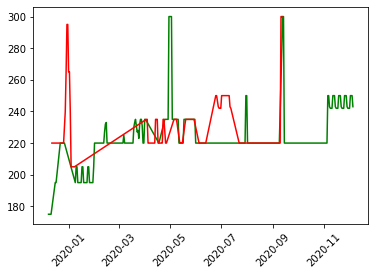

In [24]:
plt.figure()
plt.plot(dates_available, price_available, c = 'green') 
plt.plot(dates_not_available, price_not_available, c = 'red')

x = plt.gca().xaxis # we call the axis to change the ticks
for item in x.get_ticklabels(): # rotate tick labels
    item.set_rotation(45)

plt.show() # show is not needed in jupyter notebook, but you will need it when you run it as a python script

## Bar Plots

<BarContainer object of 92 artists>

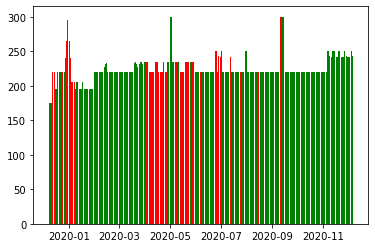

In [25]:
# here we will use plt.bar() function instead of plt.plot()
plt.figure()

plt.bar(dates_available, price_available, color = 'green') # note that barplots need the argument 'color' instead of 'c'
plt.bar(dates_not_available, price_not_available, color = 'red') 


In [26]:
# how do we group these bars in a meaningful way? what about month grouping?
# in order to group by month, we need dates to be the index of the dataframe, so we reindex
reindexed = available.set_index(available.date) # note that we go back to the initial dataset
reindexed_not = not_available.set_index(not_available.date)

print(reindexed.head())

           listing_id       date  available  price  adjusted_price  \
date                                                                 
2019-12-08      58211 2019-12-08       True  175.0           175.0   
2019-12-09      58211 2019-12-09       True  175.0           175.0   
2019-12-10      58211 2019-12-10       True  175.0           175.0   
2019-12-11      58211 2019-12-11       True  175.0           175.0   
2019-12-16      58211 2019-12-16       True  195.0           195.0   

            minimum_nights  maximum_nights  
date                                        
2019-12-08             3.0           365.0  
2019-12-09             3.0           365.0  
2019-12-10             2.0           365.0  
2019-12-11             2.0           365.0  
2019-12-16             2.0           365.0  


In [27]:
import datetime as dt

months = ['January','February','March','April','May','June','July','August',
          'September','October','November','December']

#function month_name() from dt package extracts the name of the month and matches it in the new categorical index that we defined in months
idx = pd.CategoricalIndex(reindexed.index.month_name(), categories=months, ordered=True)
idx_not = pd.CategoricalIndex(reindexed_not.index.month_name(), categories=months, ordered=True)

# we calculate the mean of each month and assign it as value
monthly = reindexed.groupby(idx).mean()
monthly_not = reindexed_not.groupby(idx_not).mean()
print(monthly)

           available       price  adjusted_price  minimum_nights  \
date                                                               
January         True  198.043478      198.043478        3.000000   
February        True  221.103448      221.103448        3.000000   
March           True  224.032258      224.032258        3.000000   
April           True  242.142857      242.142857        3.000000   
May             True  247.692308      247.692308        3.000000   
June            True  220.000000      220.000000        3.000000   
July            True  221.363636      221.363636        3.000000   
August          True  221.111111      221.111111        3.000000   
September       True  225.925926      225.925926        3.000000   
October         True  220.000000      220.000000        3.000000   
November        True  241.400000      241.400000        3.000000   
December        True  214.785714      214.785714        2.714286   

           maximum_nights  
date               

<BarContainer object of 12 artists>

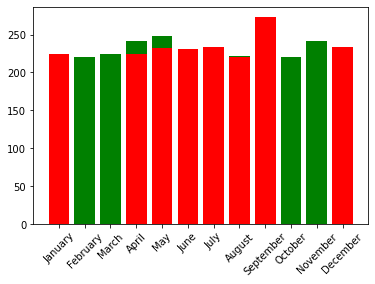

In [28]:
plt.figure()
plt.bar(monthly.index, monthly.price, color = 'green')

x = plt.gca().xaxis
for item in x.get_ticklabels(): # rotate tick labels
    item.set_rotation(45)
    
plt.bar(monthly_not.index, monthly_not.price, color = 'red')

In [29]:
# we will use the index to move the bars to a side, so we have to set a numerical index again (as our indexes right now are the dates)
monthly_reindexed = monthly.reset_index()
monthly_not_reindexed = monthly_not.reset_index()

print(monthly_reindexed)

         date  available       price  adjusted_price  minimum_nights  \
0     January       True  198.043478      198.043478        3.000000   
1    February       True  221.103448      221.103448        3.000000   
2       March       True  224.032258      224.032258        3.000000   
3       April       True  242.142857      242.142857        3.000000   
4         May       True  247.692308      247.692308        3.000000   
5        June       True  220.000000      220.000000        3.000000   
6        July       True  221.363636      221.363636        3.000000   
7      August       True  221.111111      221.111111        3.000000   
8   September       True  225.925926      225.925926        3.000000   
9     October       True  220.000000      220.000000        3.000000   
10   November       True  241.400000      241.400000        3.000000   
11   December       True  214.785714      214.785714        2.714286   

    maximum_nights  
0            365.0  
1            365.0  


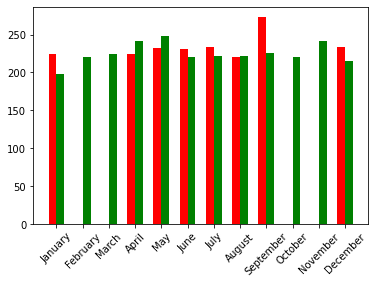

In [30]:
# we move the green bars 0.15 to the right and the red bars 0.15 to the left
ax = plt.subplot()
ax.bar(monthly_reindexed.index+0.15, monthly_reindexed.price, width = 0.3, color = 'green', align='center') #move the x axis to fit both lines
ax.bar(monthly_not_reindexed.index-0.15, monthly_not_reindexed.price, width = 0.3, color = 'red', align='center')

# we now have to assign the names of the months as xticks, because in axis x we plotted indexes 
plt.xticks(np.arange(12, step=1), (months), rotation=45)

x = plt.gca().xaxis
for item in x.get_ticklabels(): # rotate tick labels
    item.set_rotation(45)

### World temperatures Data
Every row is a datapoint: the temperature of the first day of each month

In [31]:
#import datetime as dt

w_temperature_data = pd.read_csv('data/GlobalTemperatures.csv', sep=',', index_col = False, parse_dates=['dt'])

w_temperature_data.rename(columns={'dt':'date'}, inplace=True) # we do this because we have a package called dt and it could make things confusing

print(w_temperature_data.head())

        date  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0 1750-01-01                   3.034                              3.574   
1 1750-02-01                   3.083                              3.702   
2 1750-03-01                   5.626                              3.076   
3 1750-04-01                   8.490                              2.451   
4 1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       

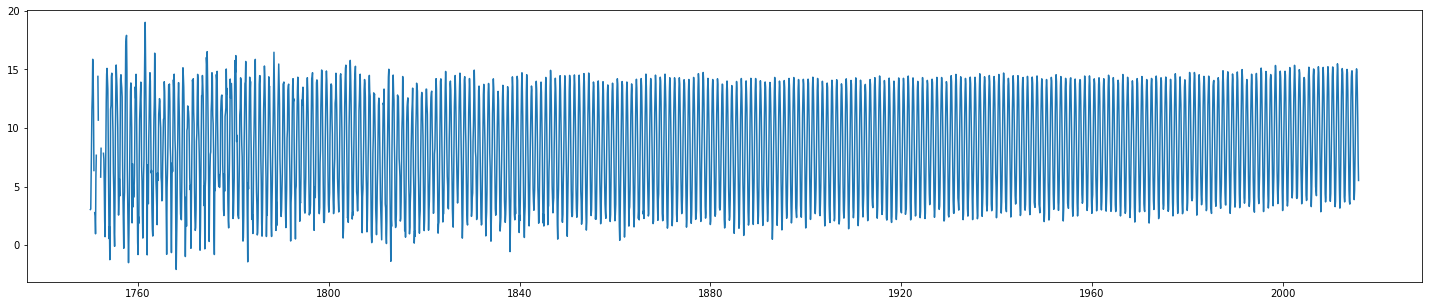

In [32]:
plt.figure(figsize=(25,5)) # note we are giving a size to the figure!
plt.plot(w_temperature_data.date, w_temperature_data.LandAverageTemperature)

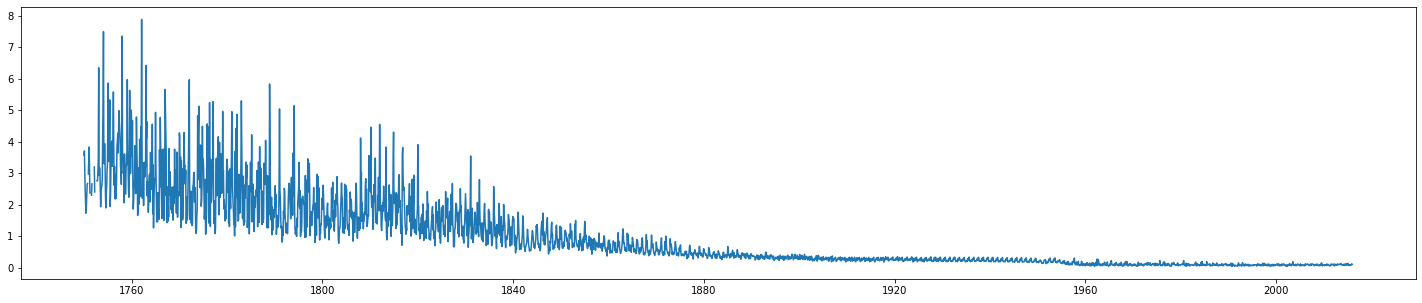

In [33]:
plt.figure(figsize=(25,5)) # note we are ginig a size to the figure!
plt.plot(w_temperature_data.date, w_temperature_data.LandAverageTemperatureUncertainty)

## Heatmap

In [34]:
import seaborn as sns

In [35]:
# question: how did temperatures change through the years for each month?

# the dt package allows us to extract the month and the year from a full date
w_temperature_data['year'] = w_temperature_data.date.dt.year
w_temperature_data['month'] = w_temperature_data.date.dt.month

# this is a three dimensional visualisation: we care about year, month and temperature
# we will use a matrix again, as we have multiple categories
temperature = w_temperature_data[['month', 'year','LandAverageTemperature']] # we select the data we want to plot
temperature_pivot = temperature.pivot(index='month', columns = 'year')
temperature_pivot.columns = temperature_pivot.columns.droplevel(0) # we drop the double column level


print(temperature_pivot.head())

year     1750   1751   1752    1753    1754    1755    1756    1757   1758  \
month                                                                        
1       3.034  2.495  0.348   2.039   1.574   1.067   3.887  -0.276 -1.503   
2       3.083  0.963    NaN   0.715  -1.249  -0.108   5.666   3.704  0.806   
3       5.626  5.800  5.806   5.424   3.677   3.607   4.192   4.529  3.765   
4       8.490  7.670  8.265   8.272  11.610   9.263  10.042   8.246  7.210   
5      11.573    NaN    NaN  12.186  11.936  12.881  14.164  13.039  9.715   

year     1759  ...    2006    2007    2008    2009    2010    2011    2012  \
month          ...                                                           
1       5.014  ...   3.286   4.579   2.844   3.687   3.737   3.282   3.157   
2       4.082  ...   4.430   4.221   3.576   4.094   4.399   3.743   3.628   
3       4.520  ...   6.329   6.485   6.906   6.086   6.738   6.101   6.023   
4       5.983  ...   9.055   9.823   9.295   9.367   9.671   9.

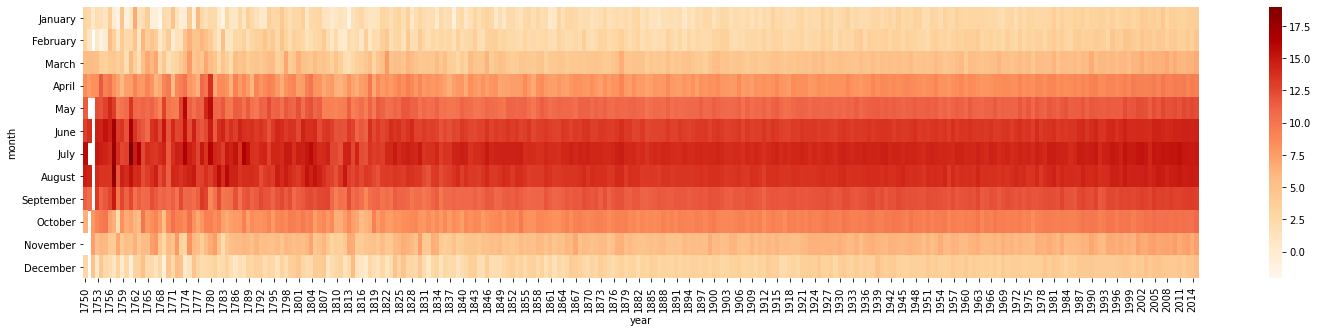

In [36]:
plt.figure(figsize=(25,5))
sns.heatmap(temperature_pivot, cmap="OrRd", xticklabels='auto', yticklabels=months)


# Hand-in for this lab

Choose one of the datasets that we have presented today, look at their descriptions (go to the websites at the beginning of this notebook), think about an interesting question and create a plot that answers it. 

Examples: 
- How has the exchange of students between the Netherlands and Germany evolved?
- Have winter temperatures changed throughout the last century?
- In which months are there more available rooms in Amsterdam?

You can do this exercise in pairs, but each person should hand it in individually. You can hand it in as a jupyter notebook and add a brief description (2-3 sentences). 